# A "Simple Program"


In [13]:
#!pip install pandas_datareader 

In [11]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you might need to install this (see above)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

# don't copy and paste these lists and number in several places 
# (which is what the original "simple program" did... that's bad programming!)
# instead, create a var - if we change it here, it changes everywhere
stocks = ['GME','AMC','BB','BBBY','TSLA','GM','VZ']
start_yr = datetime(2021, 1, 1)



In [12]:
# load
stock_prices = pdr.get_data_yahoo(stocks, start=start_yr)
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
stock_prices.columns = stocks # put their tickers as column names
stock_prices # print

,GME,AMC,BB,BBBY,TSLA,GM,VZ
Date,,,,,,,
2021-01-04,17.250000,2.01,6.580000,18.030001,729.770020,40.509998,58.226662
2021-01-05,17.370001,1.98,6.770000,19.760000,735.109985,41.660000,57.959522
2021-01-06,18.360001,2.01,6.710000,21.030001,755.979980,42.980000,58.662003
2021-01-07,18.080000,2.05,7.060000,18.730000,816.039978,43.320000,58.529999
2021-01-08,17.690001,2.14,7.560000,18.940001,880.020020,43.060001,57.799999
2021-01-11,19.940001,2.20,7.650000,20.490000,811.190002,45.009998,57.459999
2021-01-12,19.950001,2.29,7.630000,21.530001,849.440002,47.820000,57.259998
2021-01-13,31.400000,2.18,7.440000,23.020000,854.409973,48.730000,57.060001
2021-01-14,39.910000,2.18,9.110000,27.340000,845.000000,51.529999,57.040001


<AxesSubplot:xlabel='Date'>

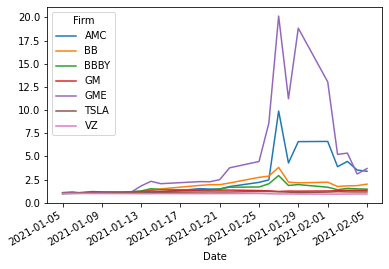

In [7]:
(stock_prices
     .assign(ret=1+stock_prices.ret)              # gross returns
     .set_index(['Date','Firm'])['ret'].unstack() # convert to wide format
     .cumprod()
     .plot()
)